# Understanding Income Inequality

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
dfr = pd.read_csv('adult.csv', header=None) 
dfr # dataset loaded

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36.0,United-States,<=50K
48838,64.0,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0,0,40.0,United-States,<=50K
48839,38.0,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50.0,United-States,<=50K
48840,44.0,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40.0,United-States,<=50K


In [3]:
dfr.head() #head of the dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [4]:
headers = ['Age', 'Workclass', 'fnlwgt', 'Level','Education-num','Marital-status','Occupation','Relationship','Race','Sex','Capital-gain','Capital-Loss','Hours-per-week','Native-country','Salary']

In [5]:
dfr.columns = headers

In [6]:
dfr.head()

,Age,Workclass,fnlwgt,Level,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-Loss,Hours-per-week,Native-country,Salary
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [7]:
dfr.tail()

,Age,Workclass,fnlwgt,Level,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-Loss,Hours-per-week,Native-country,Salary
48837,39.0,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36.0,United-States,<=50K
48838,64.0,?,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0,0,40.0,United-States,<=50K
48839,38.0,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50.0,United-States,<=50K
48840,44.0,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40.0,United-States,<=50K
48841,35.0,Self-emp-inc,182148.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60.0,United-States,>50K


In [8]:
dfr = dfr.drop('fnlwgt', axis=1) #dropped the fnlwgt column
dfr

,Age,Workclass,Level,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-Loss,Hours-per-week,Native-country,Salary
0,39.0,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36.0,United-States,<=50K
48838,64.0,?,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0,0,40.0,United-States,<=50K
48839,38.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50.0,United-States,<=50K
48840,44.0,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40.0,United-States,<=50K


In [9]:
dfr.shape

(48842, 14)

In [10]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             48836 non-null  float64
 1   Workclass       48842 non-null  object 
 2   Level           48842 non-null  object 
 3   Education-num   48825 non-null  float64
 4   Marital-status  48842 non-null  object 
 5   Occupation      48842 non-null  object 
 6   Relationship    48842 non-null  object 
 7   Race            48842 non-null  object 
 8   Sex             48842 non-null  object 
 9   Capital-gain    48842 non-null  int64  
 10  Capital-Loss    48842 non-null  int64  
 11  Hours-per-week  48819 non-null  float64
 12  Native-country  48842 non-null  object 
 13  Salary          48825 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 5.2+ MB


In [11]:
dfr.isnull().sum() #NA value check

Age                6
Workclass          0
Level              0
Education-num     17
Marital-status     0
Occupation         0
Relationship       0
Race               0
Sex                0
Capital-gain       0
Capital-Loss       0
Hours-per-week    23
Native-country     0
Salary            17
dtype: int64

In [12]:
#identifying garbage values

for i in dfr.select_dtypes(include="object").columns:
    print(dfr[i].value_counts())
    print("***"*10)

Workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64
******************************
Level
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64
******************************
Marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64
**************************

In [13]:
dfr.isin(['?']).sum(axis=0) #Locating the character "?"

Age                  0
Workclass         2799
Level                0
Education-num        0
Marital-status       0
Occupation        2809
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-Loss         0
Hours-per-week       0
Native-country     857
Salary               0
dtype: int64

In [14]:
dfr['Native-country'] = dfr['Native-country'].replace('?',np.nan) #replacing the character with NAN 
dfr['Workclass'] = dfr['Workclass'].replace('?',np.nan)
dfr['Occupation'] = dfr['Occupation'].replace('?',np.nan)

In [15]:
dfr.isnull().sum() #NA value check

Age                  6
Workclass         2799
Level                0
Education-num       17
Marital-status       0
Occupation        2809
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-Loss         0
Hours-per-week      23
Native-country     857
Salary              17
dtype: int64

In [16]:
dfr.isnull().sum()/dfr.shape[0]*100 #To check the percentage of missing data per feature

Age               0.012285
Workclass         5.730724
Level             0.000000
Education-num     0.034806
Marital-status    0.000000
Occupation        5.751198
Relationship      0.000000
Race              0.000000
Sex               0.000000
Capital-gain      0.000000
Capital-Loss      0.000000
Hours-per-week    0.047091
Native-country    1.754637
Salary            0.034806
dtype: float64

In [17]:
dfr.duplicated().sum()

6365

In [18]:
dp_rows = dfr[dfr.duplicated()]
print(dp_rows)

        Age Workclass         Level  Education-num      Marital-status  \
352    33.0   Private     Bachelors           13.0  Married-civ-spouse   
391    27.0   Private     Bachelors           13.0       Never-married   
563    24.0   Private       HS-grad            9.0       Never-married   
570    24.0   Private       HS-grad            9.0       Never-married   
673    33.0   Private     Bachelors           13.0  Married-civ-spouse   
...     ...       ...           ...            ...                 ...   
48824  22.0   Private  Some-college           10.0       Never-married   
48830  32.0   Private       HS-grad            9.0  Married-civ-spouse   
48833  31.0   Private       HS-grad            9.0  Married-civ-spouse   
48834  25.0   Private       HS-grad            9.0       Never-married   
48839  38.0   Private     Bachelors           13.0  Married-civ-spouse   

              Occupation   Relationship   Race     Sex  Capital-gain  \
352      Exec-managerial        Husband

In [19]:
dp_rows.sort_values(by = 'Age')

,Age,Workclass,Level,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-Loss,Hours-per-week,Native-country,Salary
41535,17.0,Private,12th,8.0,Never-married,Sales,Own-child,White,Female,0,0,20.0,United-States,<=50K
46934,17.0,Private,11th,7.0,Never-married,Sales,Own-child,White,Female,0,0,35.0,United-States,<=50K
24667,17.0,Private,12th,8.0,Never-married,Sales,Own-child,White,Female,0,0,20.0,United-States,<=50K
24686,17.0,NaN,10th,6.0,Never-married,NaN,Own-child,White,Female,0,0,20.0,United-States,<=50K
10131,17.0,Private,12th,8.0,Never-married,Other-service,Own-child,White,Male,0,0,16.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31043,72.0,NaN,HS-grad,9.0,Married-civ-spouse,NaN,Husband,White,Male,0,0,8.0,United-States,<=50K
48400,72.0,NaN,HS-grad,9.0,Married-civ-spouse,NaN,Husband,White,Male,0,0,8.0,United-States,<=50K
29119,73.0,NaN,HS-grad,9.0,Widowed,NaN,Not-in-family,White,Female,0,0,15.0,United-States,<=50K
31030,90.0,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40.0,United-States,<=50K


In [20]:
dfr = dfr.drop_duplicates() #Removed duplicate rows

In [21]:
dfr.duplicated().sum()

0

In [22]:
dfr.head()

,Age,Workclass,Level,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-Loss,Hours-per-week,Native-country,Salary
0,39.0,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [23]:
dfr.duplicated().sum()

0

In [24]:
dfr.shape

(42477, 14)

In [25]:
dfr.isnull().sum()/dfr.shape[0]*100 #To check the percentage of missing data per feature

Age               0.014125
Workclass         5.678367
Level             0.000000
Education-num     0.040022
Marital-status    0.000000
Occupation        5.701909
Relationship      0.000000
Race              0.000000
Sex               0.000000
Capital-gain      0.000000
Capital-Loss      0.000000
Hours-per-week    0.054147
Native-country    2.008146
Salary            0.040022
dtype: float64

In [26]:
from sklearn.impute import KNNImputer  #KNN Imputer 
impute = KNNImputer()

In [27]:
import warnings
warnings.filterwarnings('ignore')

for i in dfr.select_dtypes(include = 'number').columns: #loop to apply the imputer
    if i == 'Salary':
        continue
    dfr[i]=impute.fit_transform(dfr[[i]])

In [28]:
dfr.isnull().sum()

Age                  0
Workclass         2412
Level                0
Education-num        0
Marital-status       0
Occupation        2422
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-Loss         0
Hours-per-week       0
Native-country     853
Salary              17
dtype: int64

In [29]:
for i in ['Workclass', 'Occupation', 'Native-country']: #used mode to fill the NA values in categorical variables
    dfr[i].fillna(dfr[i].mode().iloc[0], inplace=True)


In [30]:
dfr.dropna(how='any',inplace=True) #dropped NA values for the Salary feature

In [31]:
dfr.isnull().sum() #data does not have any missing values

Age               0
Workclass         0
Level             0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-Loss      0
Hours-per-week    0
Native-country    0
Salary            0
dtype: int64

In [32]:
dfr

,Age,Workclass,Level,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-Loss,Hours-per-week,Native-country,Salary
0,39.0,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33.0,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
48837,39.0,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
48838,64.0,Private,HS-grad,9.0,Widowed,Prof-specialty,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K
48840,44.0,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


In [33]:
dfr.describe()

,Age,Education-num,Capital-gain,Capital-Loss,Hours-per-week
count,42460.000000,42460.000000,42460.000000,42460.000000,42460.000000
mean,39.473312,10.094079,1225.853815,99.790132,40.648609
std,13.776648,2.658177,7931.376418,428.926661,12.863382
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,38.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,49.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [34]:
pd.crosstab(
    index=dfr["Level"], columns=dfr["Education-num"] #to check Education column has some other information then level
)

Education-num,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,10.094489,11.000000,12.000000,13.000000,14.000000,15.000000,16.000000
Level,,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1277,0,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1597,0,0,0,1,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,616,0,0,0,0,0,0,0,0,0
1st-4th,0,242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,498,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,931,0,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,737,0,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,0,1562,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1,1960,0,0,0,0,0


In [35]:
dfr = dfr.drop('Education-num', axis=1) #same values (redundant)

In [36]:
dfr['Capital-gain'].value_counts

<bound method IndexOpsMixin.value_counts of 0        2174.0
1           0.0
2           0.0
3           0.0
4           0.0
          ...  
48836       0.0
48837       0.0
48838       0.0
48840    5455.0
48841       0.0
Name: Capital-gain, Length: 42460, dtype: float64>

In [37]:
dfr.describe(include="object")

,Workclass,Level,Marital-status,Occupation,Relationship,Race,Sex,Native-country,Salary
count,42460,42460,42460,42460,42460,42460,42460,42460,42460
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,30721,12920,19212,8098,16638,35536,27985,38339,32015


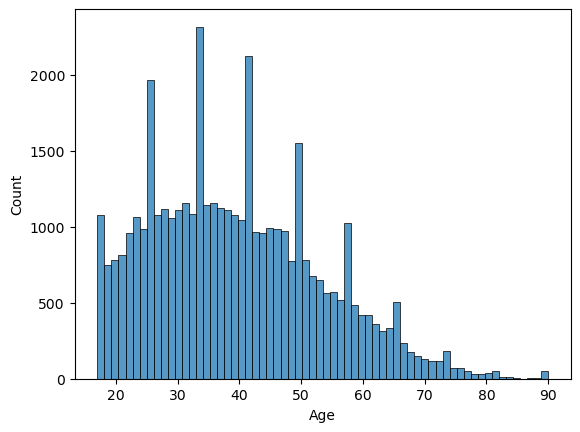

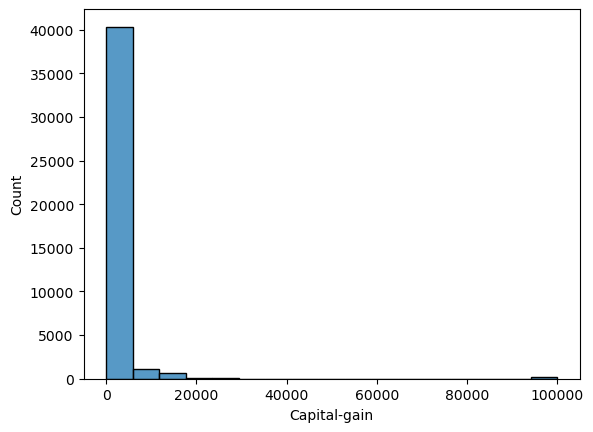

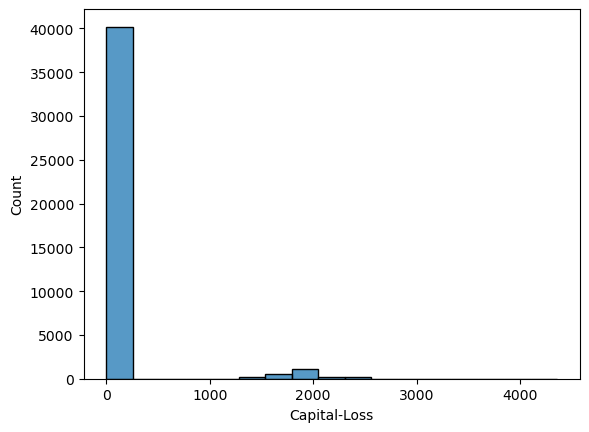

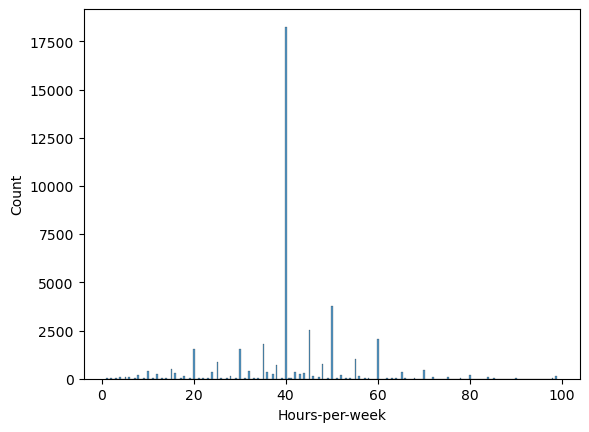

In [38]:
for i in dfr.select_dtypes(include="number").columns: #histogram of all numerical columns
    sns.histplot(data=dfr,x=i)
    plt.show()

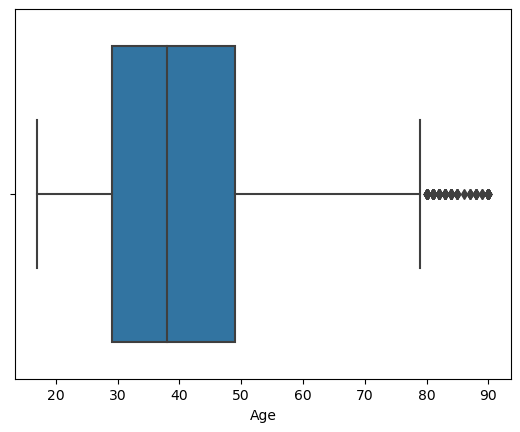

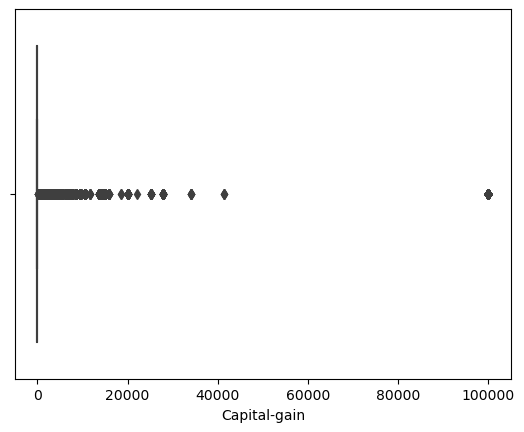

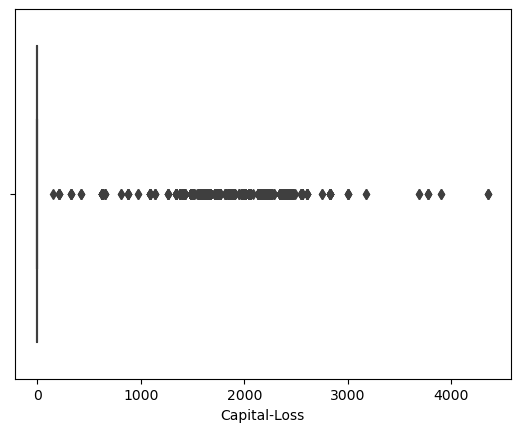

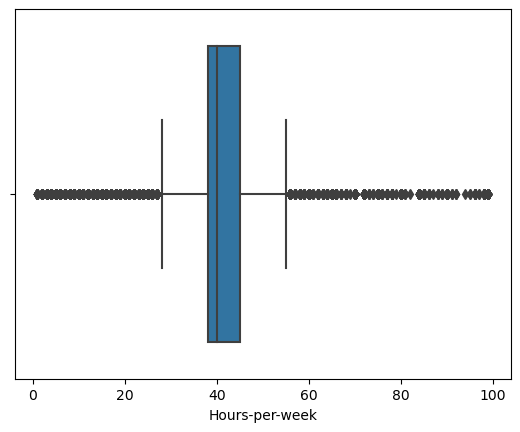

In [39]:
for i in dfr.select_dtypes(include="number").columns: #boxplots of all numerical columns
    sns.boxplot(data=dfr,x=i)
    plt.show()

In [40]:
dfr.select_dtypes(include="number").columns

Index(['Age', 'Capital-gain', 'Capital-Loss', 'Hours-per-week'], dtype='object')

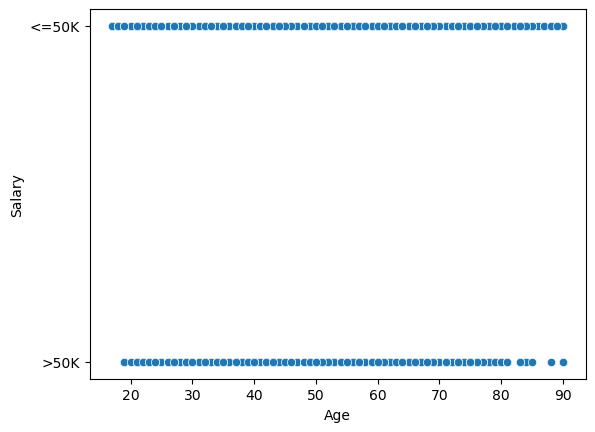

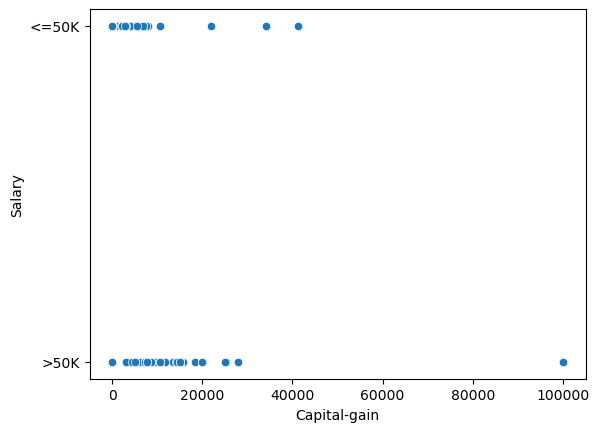

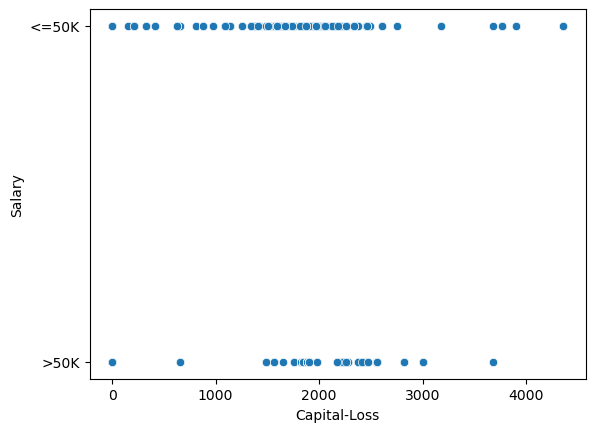

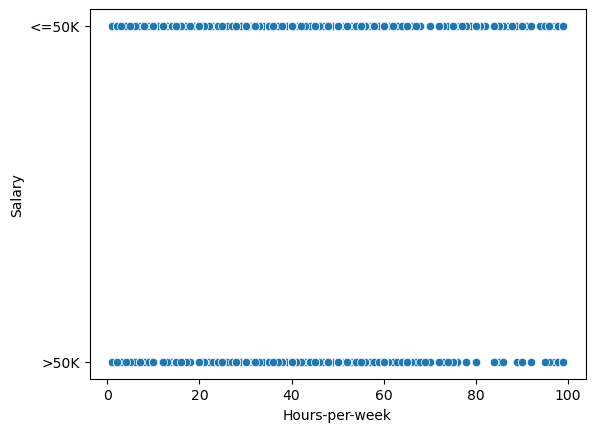

In [41]:
for i in ['Age', 'Capital-gain', 'Capital-Loss', 'Hours-per-week']:
    sns.scatterplot(data=dfr,x=i,y='Salary')
    plt.show()

In [42]:
hmp = dfr.select_dtypes(include="number").corr()

<Axes: >

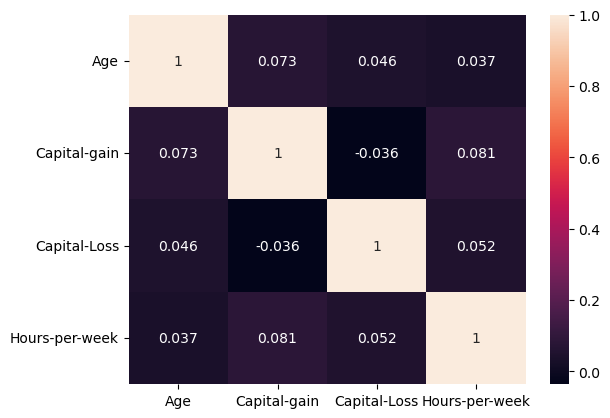

In [68]:
 #heatmap showing correlation cooefficients of numerical values
sns.heatmap(hmp, annot=True)

In [44]:
dfr.head()

,Age,Workclass,Level,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-Loss,Hours-per-week,Native-country,Salary
0,39.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38.0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [45]:
dfr.select_dtypes(include="object").columns

Index(['Workclass', 'Level', 'Marital-status', 'Occupation', 'Relationship',
       'Race', 'Sex', 'Native-country', 'Salary'],
      dtype='object')

In [46]:
from sklearn.preprocessing import OrdinalEncoder #ordinal encoder to convert categorical variables 

oe = OrdinalEncoder()

def ordinal_encoder(df,column):
    df[column] = oe.fit_transform(df[column])
    return df

In [47]:
dfr = ordinal_encoder(dfr,['Workclass', 'Marital-status', 'Relationship','Race', 'Sex', 'Salary'])

In [48]:
from sklearn.preprocessing import LabelEncoder #label encoder as these varibales have greater unique values

def preprocessing(df, columns):
    df = df.copy()
    le = LabelEncoder()

    # Loop through each column in the subset
    for column in columns:
        df[column] = le.fit_transform(df[column])

    return df

set1 = ['Level', 'Occupation', 'Native-country']
dfr = preprocessing(dfr, set1)


In [49]:
dfr

,Age,Workclass,Level,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-Loss,Hours-per-week,Native-country,Salary
0,39.0,6.0,9,4.0,0,1.0,4.0,1.0,2174.0,0.0,40.0,38,0.0
1,50.0,5.0,9,2.0,3,0.0,4.0,1.0,0.0,0.0,13.0,38,0.0
2,38.0,3.0,11,0.0,5,1.0,4.0,1.0,0.0,0.0,40.0,38,0.0
3,53.0,3.0,1,2.0,5,0.0,2.0,1.0,0.0,0.0,40.0,38,0.0
4,28.0,3.0,9,2.0,9,5.0,2.0,0.0,0.0,0.0,40.0,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33.0,3.0,9,4.0,9,3.0,4.0,1.0,0.0,0.0,40.0,38,0.0
48837,39.0,3.0,9,0.0,9,1.0,4.0,0.0,0.0,0.0,36.0,38,0.0
48838,64.0,3.0,11,6.0,9,2.0,2.0,1.0,0.0,0.0,40.0,38,0.0
48840,44.0,3.0,9,0.0,0,3.0,1.0,1.0,5455.0,0.0,40.0,38,0.0


In [50]:
dfr.shape

(42460, 13)

<Axes: >

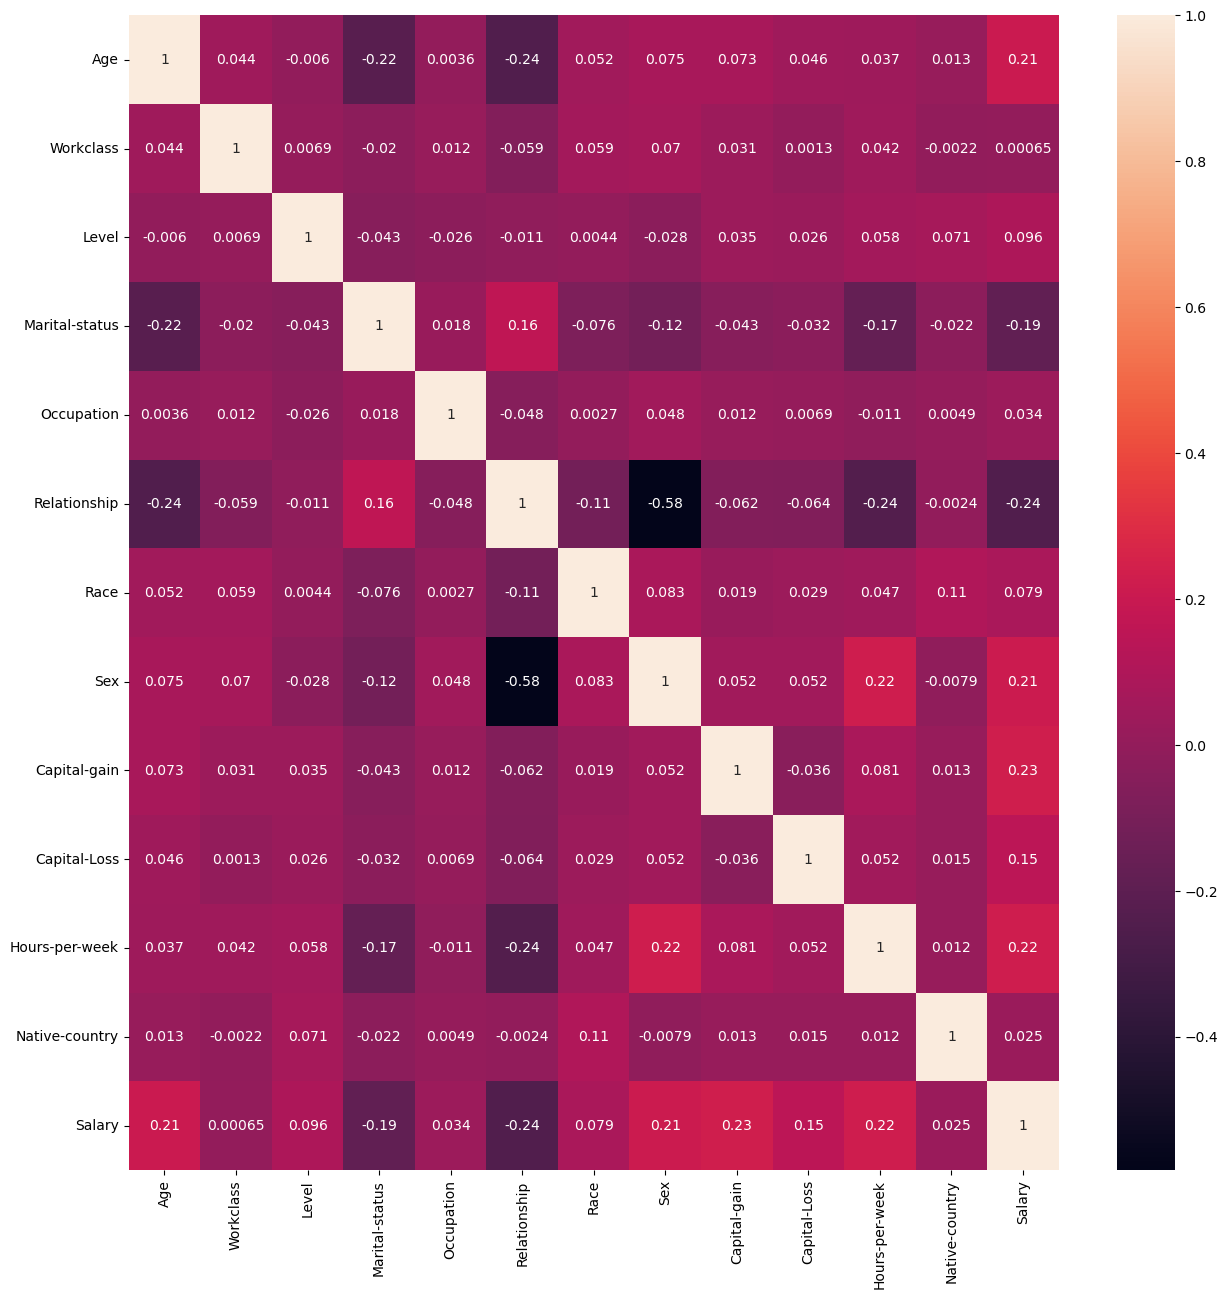

In [51]:
plt.figure(figsize=(15,15)) #heatmap of all columns 
sns.heatmap(dfr.corr(), annot=True)


In [52]:
X = dfr.iloc[:,:12] #independent variables

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2,k=3)
fit = bestfeatures.fit(X,dfr.iloc[:,-1])


In [54]:
bestfeatures

SelectKBest(k=3, score_func=<function chi2 at 0x0000015D26FB6020>)

In [55]:
fit

SelectKBest(k=3, score_func=<function chi2 at 0x0000015D26FB6020>)

In [56]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)


In [57]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
featurescores = pd.concat([dfcolumns,dfscores],axis =1)
featurescores.columns = ['Spec','Score']
featurescores = featurescores.sort_values(by='Score', ascending=False)

In [58]:
for col in X.columns:    #outlier treatment
    percentile=X[col].quantile([0.01,0.98]).values
    X[col][X[col]<=percentile[0]]=percentile[0]
    X[col][X[col]>=percentile[1]]=percentile[1]

In [59]:
X.skew()

Age               0.417
Workclass         0.041
Level            -0.887
Marital-status    0.022
Occupation       -0.046
Relationship      0.791
Race             -2.245
Sex              -0.671
Capital-gain      4.284
Capital-Loss      4.063
Hours-per-week   -0.237
Native-country   -3.890
dtype: float64

In [60]:
from sklearn.preprocessing import power_transform #skew treatment
columns = X.columns


X_transformed = power_transform(X, method='yeo-johnson')
X = pd.DataFrame(X_transformed, columns=columns)


In [61]:
featurescores #Best fit score according to Chi square

,Spec,Score
8,Capital-gain,118311621.703
9,Capital-Loss,1801262.322
0,Age,8789.848
10,Hours-per-week,8522.138
5,Relationship,4480.695
3,Marital-status,1364.816
7,Sex,652.096
2,Level,588.863
4,Occupation,120.704
6,Race,58.719


In [62]:
X = X.iloc[:, [0, 10, 2]]
Y = dfr.iloc[:,-1]

In [63]:
dfr.Salary.value_counts()

Salary
0.000    32015
1.000    10445
Name: count, dtype: int64

In [64]:
from imblearn.combine import SMOTETomek #imbalenced data treatment

smk = SMOTETomek(random_state=42)
X_res, Y_res = smk.fit_resample(X, Y)


In [65]:
X_res.shape, Y_res.shape

((63544, 3), (63544,))

In [66]:
from sklearn.model_selection import train_test_split #Train/Test data split
X_train, X_test, Y_train, Y_test = train_test_split(X_res,Y_res, test_size=0.20)

In [67]:
from sklearn.neighbors import KNeighborsClassifier #KNN algorithm
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

for n_neighbors in range(1, 11):
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier.fit(X_train, Y_train)

    Y_pred = classifier.predict(X_test)

    print(f"Results for n_neighbors={n_neighbors}:")
    print(classification_report(Y_test, Y_pred))
    print(f"Confusion Matrix:")
    print(confusion_matrix(Y_test, Y_pred))
    print("="*50)


Results for n_neighbors=1:
              precision    recall  f1-score   support

         0.0       0.69      0.73      0.71      6274
         1.0       0.72      0.69      0.70      6435

    accuracy                           0.71     12709
   macro avg       0.71      0.71      0.71     12709
weighted avg       0.71      0.71      0.71     12709

Confusion Matrix:
[[4573 1701]
 [2011 4424]]
Results for n_neighbors=2:
              precision    recall  f1-score   support

         0.0       0.62      0.85      0.72      6274
         1.0       0.77      0.49      0.60      6435

    accuracy                           0.67     12709
   macro avg       0.69      0.67      0.66     12709
weighted avg       0.69      0.67      0.66     12709

Confusion Matrix:
[[5328  946]
 [3296 3139]]
Results for n_neighbors=3:
              precision    recall  f1-score   support

         0.0       0.73      0.71      0.72      6274
         1.0       0.72      0.74      0.73      6435

    accurac